In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time, os
import cmcrameri.cm as cm

from tqdm import tqdm
from utils import ELFData, ELFModel

## Load and filter data

In [2]:
# Perform center crop
center = True

In [3]:
# Load data
unlabeled = ELFData()
unlabeled.load_processed(dirname='data/unlabeled', structure=False)
print('Number of examples:', len(unlabeled.data))
unlabeled.data.head()

Parse profiles: 100%|██████████| 320585/320585 [00:18<00:00, 17038.80it/s]      


Number of examples: 320585


,formula,r_src,r_dst,e_src,e_dst,g_src,g_dst,elf,e_diff,edge_src,edge_dst,l,r_diff,g_diff,specie_src,specie_dst,mixed,id
0,100,2.2,1.0,0.82,3.16,1,17,"[0.0015327815625000077, 0.002364966985433359, ...",2.34,0,4,3.812422,1.2,16,K,Cl,False,0
1,100,2.2,1.0,0.82,3.16,1,17,"[0.0015327815625000077, 0.002364966985433359, ...",2.34,0,5,3.812422,1.2,16,K,Cl,False,0
2,100,2.2,1.0,0.82,3.16,1,17,"[0.0015327815625000077, 0.0070974035970135085,...",2.34,0,6,3.812422,1.2,16,K,Cl,False,0
3,100,2.2,1.0,0.82,3.16,1,17,"[0.0015327815625000077, 0.002364966985433359, ...",2.34,0,7,3.812422,1.2,16,K,Cl,False,0
4,100,2.2,1.0,0.82,3.16,1,17,"[0.0015327815625000077, 0.0070974035970135085,...",2.34,0,8,3.812422,1.2,16,K,Cl,False,0


In [4]:
# Center crop
if center:
    dx = len(unlabeled.data.iloc[0]['elf'])//4
    unlabeled.data['elf'] = unlabeled.data['elf'].apply(lambda x: x[dx:-dx])

In [5]:
# Sort and filter data
unlabeled.data = unlabeled.data[~unlabeled.data['mixed']]
unlabeled.get_pdf_cdf()
unlabeled.sort_by_cdf()
print('Number of examples:', len(unlabeled.data))
unlabeled.data.head()

Number of examples: 279511


,formula,r_src,r_dst,e_src,e_dst,g_src,g_dst,elf,e_diff,edge_src,...,specie_src,specie_dst,mixed,id,A,pdf,cdf,elf_srt,pdf_srt,cdf_srt
0,100,2.2,1.0,0.82,3.16,1,17,"[0.2836648820223565, 0.26950409607068304, 0.21...",2.34,0,...,K,Cl,False,0,5.582426,"[0.05081391150628384, 0.048277238940128635, 0....","[0.05081391150628384, 0.09909115044641248, 0.1...","[0.7455893527640319, 0.7108431083288929, 0.664...","[0.13356010487189254, 0.12733588502023072, 0.1...","[0.13356010487189254, 0.26089598989212326, 0.3..."
1,100,2.2,1.0,0.82,3.16,1,17,"[0.2836648820223565, 0.26950409607068304, 0.21...",2.34,0,...,K,Cl,False,0,5.582426,"[0.05081391150628384, 0.048277238940128635, 0....","[0.05081391150628384, 0.09909115044641248, 0.1...","[0.7455893527640319, 0.7108431083288929, 0.664...","[0.13356010487189254, 0.12733588502023072, 0.1...","[0.13356010487189254, 0.26089598989212326, 0.3..."
2,100,2.2,1.0,0.82,3.16,1,17,"[0.2260318457264771, 0.16062050292447833, 0.08...",2.34,0,...,K,Cl,False,0,6.125955,"[0.03689740731760198, 0.026219668741431404, 0....","[0.03689740731760198, 0.06311707605903338, 0.0...","[0.7686432045114789, 0.7525041401522609, 0.723...","[0.12547321067796205, 0.12283867203818265, 0.1...","[0.12547321067796205, 0.24831188271614468, 0.3..."
3,100,2.2,1.0,0.82,3.16,1,17,"[0.2836648820223565, 0.26950409607068304, 0.21...",2.34,0,...,K,Cl,False,0,5.582426,"[0.05081391150628384, 0.048277238940128635, 0....","[0.05081391150628384, 0.09909115044641248, 0.1...","[0.7455893527640319, 0.7108431083288929, 0.664...","[0.13356010487189254, 0.12733588502023072, 0.1...","[0.13356010487189254, 0.26089598989212326, 0.3..."
4,100,2.2,1.0,0.82,3.16,1,17,"[0.2260318457264771, 0.16062050292447833, 0.08...",2.34,0,...,K,Cl,False,0,6.125955,"[0.03689740731760198, 0.026219668741431404, 0....","[0.03689740731760198, 0.06311707605903338, 0.0...","[0.7686432045114789, 0.7525041401522609, 0.723...","[0.12547321067796205, 0.12283867203818265, 0.1...","[0.12547321067796205, 0.24831188271614468, 0.3..."


### Calculate columns

In [6]:
unlabeled.data['pdf-l_srt'] = unlabeled.data[['pdf_srt', 'l']].apply(
    lambda x: x.pdf_srt/(x.l/len(x.pdf_srt)), axis=1)

unlabeled.data['cdf-A_srt'] = unlabeled.data[['cdf_srt', 'A']].apply(lambda x: x.cdf_srt*x.A, axis=1)

## Predict data classes

In [7]:
n_classes = 4
n_components = 10
columns = ['elf_srt', 'pdf_srt', 'pdf-l_srt', 'cdf_srt', 'cdf-A_srt']
features = ['l', 'A']
n_estimators = 150
max_depth = 12

### Load models

In [8]:
savedir = 'models/'
models = []
for column in columns:
    path = '_'.join([j + str(k) for (j,k) in zip(['c', 'z', 'n', 'd'],
                     [n_classes, n_components, n_estimators, max_depth])] + [column] + features)
    if center:
        path += '_cen'
        
    models.append(ELFModel(n_classes))
    models[-1].load_model(savedir + path)

### Predict

In [9]:
for i in tqdm(range(len(columns)), bar_format=unlabeled.bar_format):
    models[i].prepare_inputs(unlabeled.data)
    unlabeled.data = models[i].clf_predict(unlabeled.data)

100%|██████████| 5/5 [00:44<00:00,  8.89s/it]                                   


In [10]:
unlabeled.data.head()

,formula,r_src,r_dst,e_src,e_dst,g_src,g_dst,elf,e_diff,edge_src,...,pdf_srt_pred,z_pdf-l_srt,pdf-l_srt_pred_proba,pdf-l_srt_pred,z_cdf_srt,cdf_srt_pred_proba,cdf_srt_pred,z_cdf-A_srt,cdf-A_srt_pred_proba,cdf-A_srt_pred
0,100,2.2,1.0,0.82,3.16,1,17,"[0.2836648820223565, 0.26950409607068304, 0.21...",2.34,0,...,3,"[-1.1838344857188567, 0.07579802560330025, -0....","[0.04, 0.0, 0.08, 0.88]",3,"[0.44357028974935075, 0.24773605780913108, -0....","[0.09333333333333334, 0.0, 0.3, 0.606666666666...",3,"[-7.379236292334275, -1.7584326587602614, -0.4...","[0.06597456472169717, 0.0, 0.226741322381525, ...",3
1,100,2.2,1.0,0.82,3.16,1,17,"[0.2836648820223565, 0.26950409607068304, 0.21...",2.34,0,...,3,"[-1.1838344857188567, 0.07579802560330032, -0....","[0.04, 0.0, 0.08, 0.88]",3,"[0.4435702897493515, 0.24773605780913088, -0.0...","[0.09333333333333334, 0.0, 0.3, 0.606666666666...",3,"[-7.379236292334271, -1.7584326587602626, -0.4...","[0.06597456472169717, 0.0, 0.226741322381525, ...",3
2,100,2.2,1.0,0.82,3.16,1,17,"[0.2260318457264771, 0.16062050292447833, 0.08...",2.34,0,...,2,"[-1.0357398449387318, 0.1578095611717921, -0.4...","[0.13273130109252043, 0.0, 0.35393536557414623...",3,"[0.6469650677157515, 0.06523771989563984, -0.0...","[0.19333333333333333, 0.0, 0.30666666666666664...",3,"[-4.223699618268708, -2.7971802213625905, 0.11...","[0.11565267450227874, 0.006666666666666667, 0....",3
3,100,2.2,1.0,0.82,3.16,1,17,"[0.2836648820223565, 0.26950409607068304, 0.21...",2.34,0,...,3,"[-1.1838344857188567, 0.07579802560330025, -0....","[0.04, 0.0, 0.08, 0.88]",3,"[0.44357028974935075, 0.24773605780913108, -0....","[0.09333333333333334, 0.0, 0.3, 0.606666666666...",3,"[-7.379236292334275, -1.7584326587602614, -0.4...","[0.06597456472169717, 0.0, 0.226741322381525, ...",3
4,100,2.2,1.0,0.82,3.16,1,17,"[0.2260318457264771, 0.16062050292447833, 0.08...",2.34,0,...,2,"[-1.0357398449387318, 0.15780956117179204, -0....","[0.13273130109252043, 0.0, 0.35393536557414623...",3,"[0.6469650677157515, 0.06523771989563984, -0.0...","[0.19333333333333333, 0.0, 0.30666666666666664...",3,"[-4.223699618268708, -2.7971802213625905, 0.11...","[0.11565267450227874, 0.006666666666666667, 0....",3


## Analyze predictions

### Class distribution per length and area bin

In [11]:
n_bins = 10
_, bins = np.histogram(unlabeled.data['l'], bins=n_bins)
unlabeled.data['l_bin'] = np.digitize(unlabeled.data['l'], bins[:-1], right=False).tolist()

_, bins = np.histogram(unlabeled.data['A'], bins=n_bins)
unlabeled.data['A_bin'] = np.digitize(unlabeled.data['A'], bins[:-1], right=False).tolist()

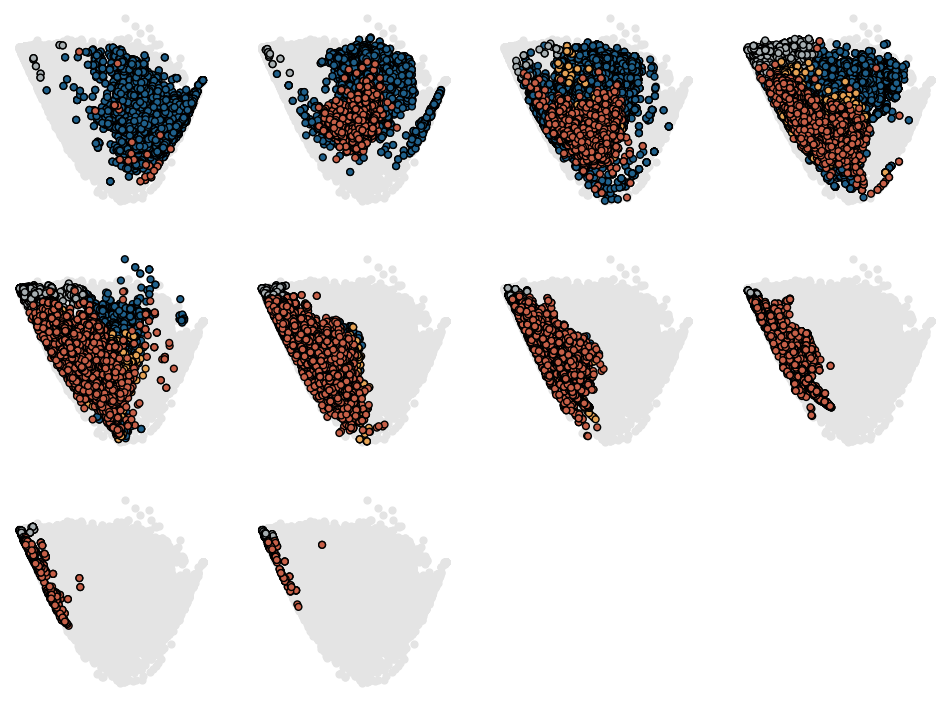

In [12]:
i = 4
x = [np.stack(unlabeled.data.loc[unlabeled.data['l_bin']==k, 'z_' + columns[i]].values) for k in range(1,n_bins+1)]
y = [unlabeled.data.loc[unlabeled.data['l_bin']==k, columns[i] + '_pred'].values for k in range(1,n_bins+1)]
fig = models[i].plot_projection_slices(x=x, y=y, axes=[0,1], cmap=models[i].dmap, order=True)

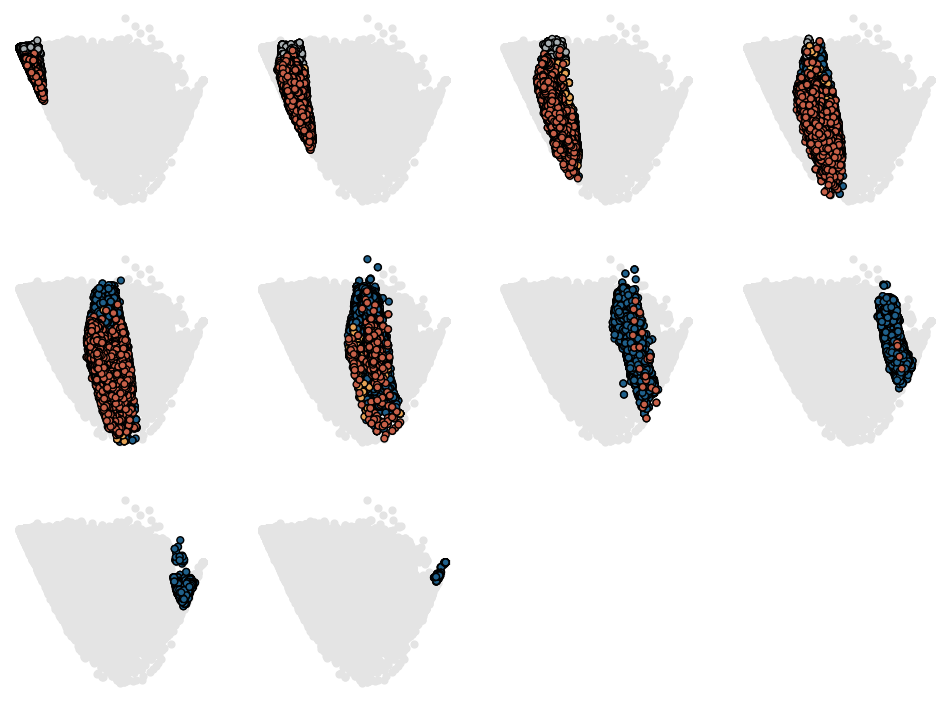

In [13]:
x = [np.stack(unlabeled.data.loc[unlabeled.data['A_bin']==k, 'z_' + columns[i]].values) for k in range(1,n_bins+1)]
y = [unlabeled.data.loc[unlabeled.data['A_bin']==k, columns[i] + '_pred'].values for k in range(1,n_bins+1)]
fig = models[i].plot_projection_slices(x=x, y=y, axes=[0,1], cmap=models[i].dmap, order=True)

### Threshold dependence

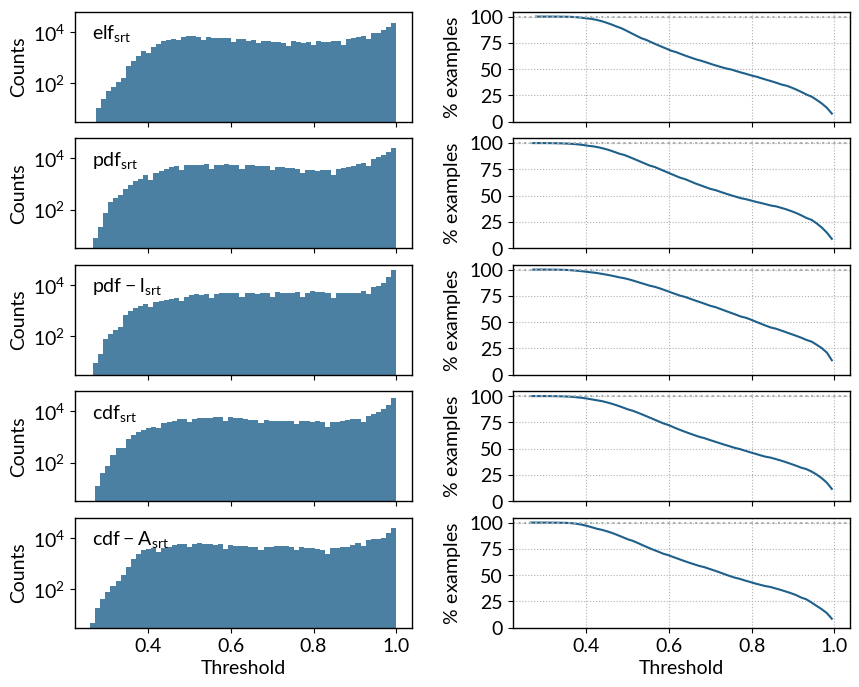

In [14]:
bins = 60
fig, ax = plt.subplots(len(columns), 2, figsize=(10,8), sharex=True, sharey='col')
fig.subplots_adjust(wspace=0.3, hspace=0.15)
for i, column in enumerate(columns):
    y, x, _ = ax[i,0].hist(unlabeled.data[column + '_pred_proba'].apply(max), bins=bins, log=True,
                           color=unlabeled.palette[0], alpha=0.8)
    ax[i,0].text(0.05, 0.9, r'$' + '_{'.join(column.split('_')) + '}$', ha='left', va='top',
                 transform=ax[i,0].transAxes)
    ax[i,1].plot(0.5*(x[:-1][::-1] + x[1:][::-1]), 100*y[::-1].cumsum()/len(unlabeled.data),
                 color=unlabeled.palette[0])
    ax[i,1].axhline(100, color=unlabeled.palette[1], ls=':')
    ax[i,1].set_ylim(bottom=0)
    ax[i,1].locator_params(axis='y', nbins=5)
    ax[i,1].grid(visible=True, ls=':')
    
    ax[i,0].set_ylabel('Counts')
    ax[i,1].set_ylabel(r'$\%\ examples$')

ax[-1,0].set_xlabel('Threshold')
ax[-1,1].set_xlabel('Threshold');

### Inspect candidate MDHs

In [15]:
formulas = [473, 479, 736, 816, 1125, 1413, 1511, 1587, 1684, 2306, 2344, 2430, 2975]
threshold = 0.6
column = columns[4]

mdh = unlabeled.get_mdhs(column=column, n_classes=n_classes, threshold=threshold, formulas=None)

Number of candidate MDHs: 30


3419


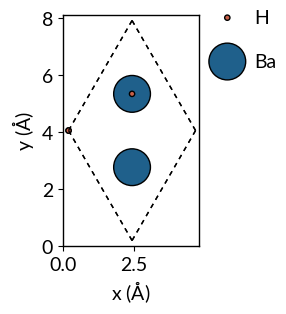

In [17]:
i = 29
entry = mdh.iloc[i]
print(entry.formula)
struct = entry.structure
unlabeled.plot_structure(struct, rotation=('0x,0y,0z'));

In [ ]:
thresholds = np.arange(0.,0.9,0.05) #thresholds = np.arange(0.,0.9,0.05)
column = columns[4]
n_mdh = np.zeros_like(thresholds)
for i, threshold in enumerate(thresholds):
    n_mdh[i] = len(unlabeled.get_mdhs(column, n_classes, threshold))

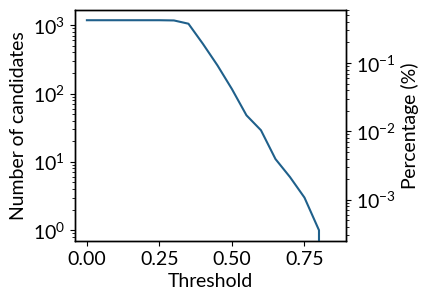

In [25]:
fig, ax = plt.subplots(figsize=(3.5,3))
_ax = ax.twinx()
ax.plot(thresholds, n_mdh, color='white')
_ax.plot(thresholds, 100*n_mdh/len(unlabeled.data), color=unlabeled.palette[0])
ax.set_yscale('log')
_ax.set_yscale('log')
ax.set_xlabel('Threshold')
ax.set_ylabel('Number of candidates');
_ax.set_ylabel('Percentage (%)');